<a href="https://colab.research.google.com/github/pythience/Desafio3/blob/master/Desafio3_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafío 3: Intención de compradores en línea 

## Documento integrador de las distintas fases de análisis


## 1. Introducción

**Información del DataSet:**

El dataset consiste en vectores de características que pertenecen a 12330 sesiones. 
El conjunto de datos se conformó de manera que cada sesión pertenezca a un usuario diferente en un período de 1 año para evitar cualquier tendencia a una campaña específica, día especial, perfil de usuario o período. 

El conjunto de datos original consta de 10 atributos numéricos y 8 atributos categóricos. 
El atributo *'Revenue'* (Ingresos) se utiliza como etiqueta de clasificación. 

*"Administrative"* (Administrativa), *"Administrative Duration"* (Duración administrativa), *"Informational"* (Informativa), *"Informational Duration"* (Duración informativa), *"Product Related"* (Producto relacionado) y *"Product Related Duration"* (Duración producto relacionado) representan el número de diferentes tipos de páginas visitadas por el visitante en esa sesión y el tiempo total invertido en cada una de estas categorías de páginas. Los valores de estas funciones se derivan de la información de URL de las páginas visitadas por el usuario y se actualizan en tiempo real cuando un usuario realiza una acción, por ejemplo: pasar de una página a otra. 

*Respecto a Google Analytics:*
Las características *"Bounce Rate"* (Tasa de rebote), *"Exit Rate"* (Tasa de salida) y ***"Page Value"* (Valor de la página)** representan las métricas medidas por "Google Analytics" para cada página en el sitio de comercio electrónico. El valor de la función "Índice de rebote" para una página web se refiere al porcentaje de visitantes que ingresan al sitio desde esa página y luego se van ("rebote") sin activar ninguna otra solicitud al servidor de análisis durante esa sesión. El valor de la columna "Tasa de salida" para una página web específica se calcula como el porcentaje del total de páginas en cada página fue la última en ser visitada en la sesión. La característica **"Valor de página"** representa el valor promedio de una página web que un usuario visitó antes de completar una transacción de comercio electrónico. 

*Otras características:*
La función "Día especial" indica la proximidad del tiempo de visita del sitio a un día especial específico (por ejemplo, el Día de la Madre, el Día de San Valentín) en el que es más probable que las sesiones finalicen con la compra. El valor de este atributo se determina considerando la dinámica del comercio electrónico, como la duración entre la fecha del pedido y la fecha de entrega. Por ejemplo, para el día de San Valentín, este valor toma un valor distinto de cero entre el 2 de febrero y el 12 de febrero, cero antes y después de esta fecha a menos que esté cerca de otro día especial, y su valor máximo de 1 el 8 de febrero. El conjunto de datos también incluye sistema operativo, navegador, región, tipo de tráfico, tipo de visitante como visitante recurrente o nuevo, un valor booleano que indica si la fecha de la visita es el fin de semana y el mes del año.

*Fuente: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset*


In [0]:
# DATASET OBTENIDO DE 
# https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#
# Total son 12330
# Revenue -> FALSE (no compraron) son 10422
# Revenue -> TRUE (compraron) son 1908

In [0]:
# Importamos las librerías necesarias
!pip install -U imbalanced-learn 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sb
%matplotlib inline
pd.options.display.max_rows = 100
pd.set_option("display.max_rows", 101)
from sklearn.feature_selection import SelectKBest, f_classif

    100% |████████████████████████████████| 174kB 8.1MB/s eta 0:00:01
    100% |████████████████████████████████| 6.7MB 1.0MB/s ta 0:00:011
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:
      Successfully uninstalled scikit-learn-0.19.1


/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# Levantamos el dataset
df = pd.read_csv("online_shoppers_intention.csv"
           , encoding = 'utf-8')
df.shape

(12330, 18)

In [0]:
df.head(100)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.000000,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.000000,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.000000,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.000000,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.000000,0,0.0,0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.000000,0,0.0,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.000000,0,0.0,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


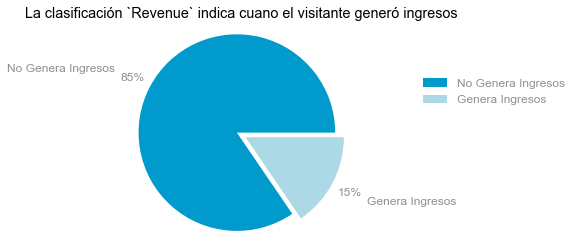

In [0]:
# Vemos que los datos están desbalanceados
from pylab import savefig

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']
revenue = [df.loc[df['Revenue'] == False].count()['Revenue'], df.loc[df['Revenue'] == True].sum()['Revenue']]

fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#909090'
plt.rcParams['axes.labelcolor']= '#909090'
plt.rcParams['xtick.color'] = '#909090'
plt.rcParams['ytick.color'] = '#909090'
plt.rcParams['font.size']=12
labels = ['No Genera Ingresos', 
         'Genera Ingresos']
#percentages = [91, 9]
explode=(0.1,0)
ax.pie(revenue, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("La clasificación `Revenue` indica cuano el visitante generó ingresos")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

C:\Users\Gaby\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


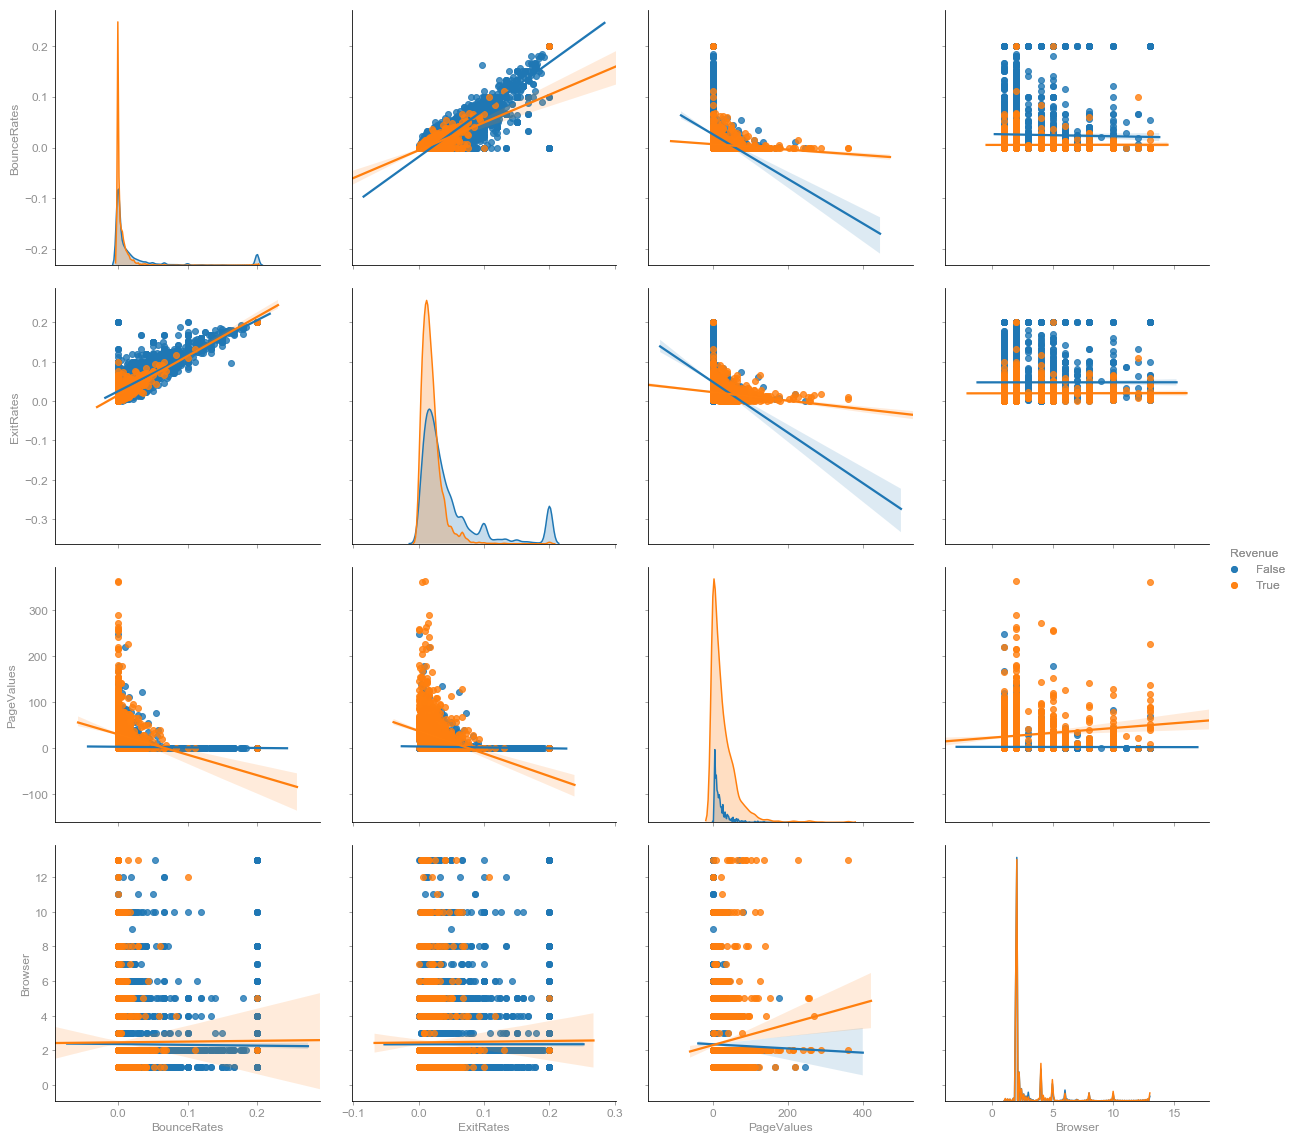

In [0]:
g = sb.pairplot(df,hue='Revenue',size=4,vars=["BounceRates", "ExitRates","PageValues","Browser"],kind='reg')
g.add_legend();
#g.plot()
g.savefig("features_pairplot.png".format(), dpi=400)


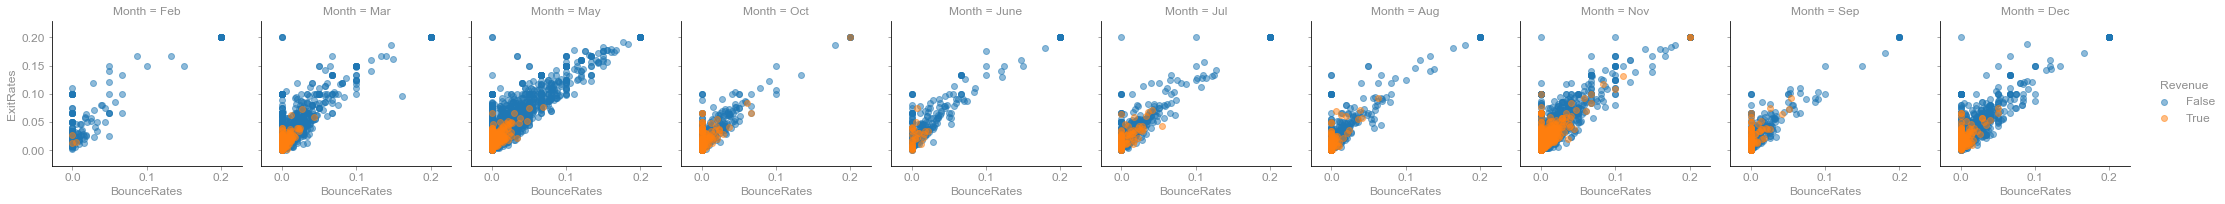

In [0]:
g = sb.FacetGrid(df, col="Month", hue="Revenue")
g.map(plt.scatter, "BounceRates", "ExitRates", alpha=.5)
g.add_legend();
#g.plot()
g.savefig("features_scatter.png".format(), dpi=400)

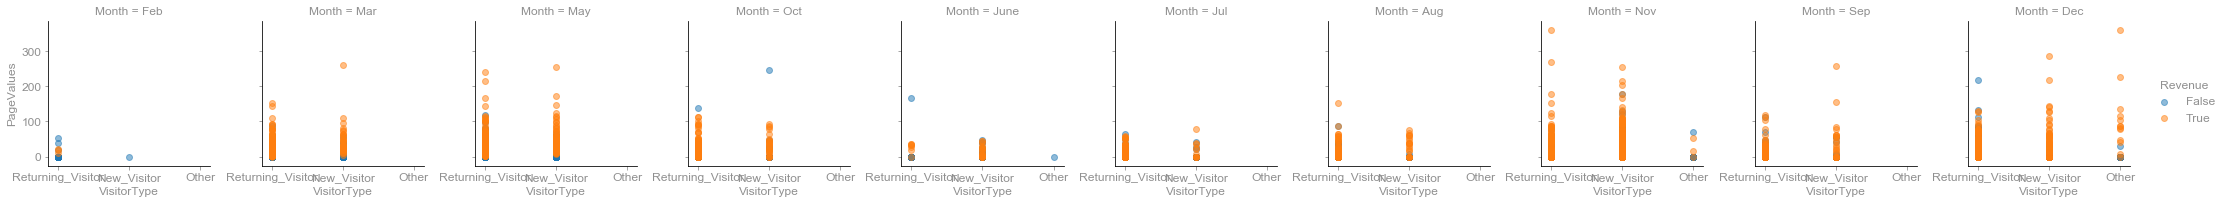

In [0]:
g = sb.FacetGrid(df, col="Month", hue="Revenue")
g.map(plt.scatter, "VisitorType", "PageValues", alpha=.5)
g.add_legend();
#g.plot()
g.savefig("features_scatter_2.png".format(), dpi=400)

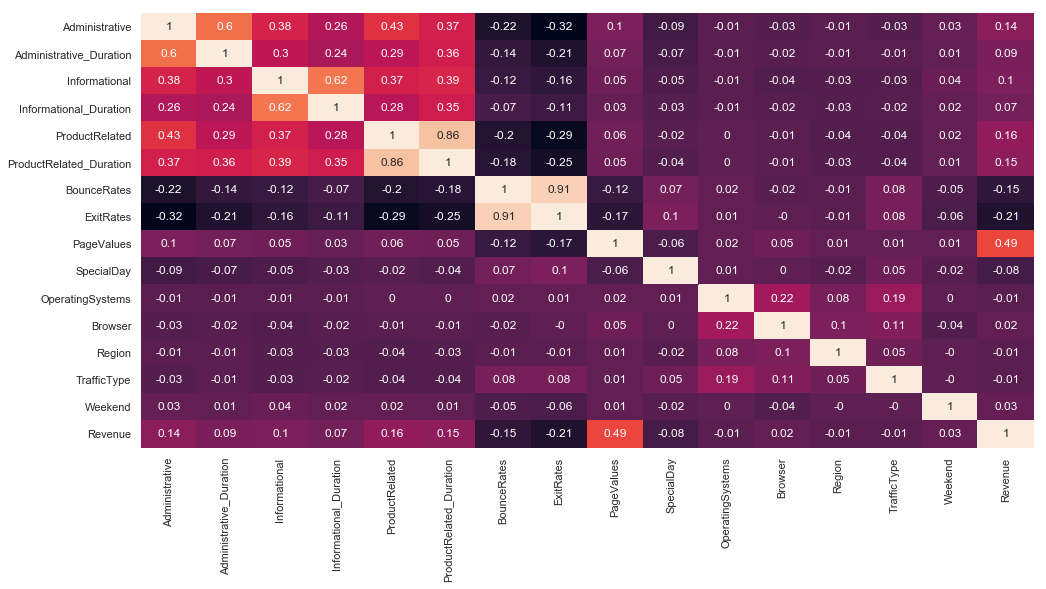

In [0]:
# Análisis gráfico exploratorio de la relación entre features
sb.set(rc={'figure.figsize':(16,8)})
# Usamos todas las features para un heatmap
sns_hm=sb.heatmap(df.corr().round(2),annot=True, cbar=False)
sns_hm.plot()
fig.savefig("features_heatmap.png".format(), dpi=400)

In [0]:
dummies = pd.get_dummies(df['VisitorType']).rename(columns=lambda x: 'VisitorType_' + str(x))
df = pd.concat([df, dummies], axis=1)
df.drop(['VisitorType'], inplace=True, axis=1)

In [0]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,False,False,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,False,False,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,False,False,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,False,False,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,True,False,0,0,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,False,False,0,0,1
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,False,False,0,0,1
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,True,False,0,0,1
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,False,False,0,0,1
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,False,False,0,0,1


In [0]:
# Construimos la matriz de features
X = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor']]

In [0]:
X.shape

(12330, 17)

In [0]:
# Construimos el vector de targets
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y =  le.fit_transform(df['Revenue'])
y

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
# Analizamos las features más importantes
selector = SelectKBest(f_classif, k=5)
selected_data = selector.fit_transform(X, y)
kbest_columns = X.columns[selector.get_support()]
Xbest = pd.DataFrame(selected_data, columns=kbest_columns)
Xbest.head()

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,1.0,0.000000,0.20,0.20,0.0
1,2.0,64.000000,0.00,0.10,0.0
2,1.0,0.000000,0.20,0.20,0.0
3,2.0,2.666667,0.05,0.14,0.0
4,10.0,627.500000,0.02,0.05,0.0


# KNN

In [0]:
# Probamos con KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing

In [0]:
# Construimos el vector de targets
le = preprocessing.LabelEncoder()
y =  le.fit_transform(df['Revenue'])
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [0]:
from sklearn.model_selection import cross_val_score

# Voy a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors

#Lista de Diccionarios
scores_para_df = []

# range(1,40,5) son los posibles valores de n_neighbors que quiero explorar. Son todos los enteros desde el 1
# hasta el 40 en saltos de a 5. (Start,Stop,Step)
for i in range(1,100,5):
    # En cada iteración instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
    cv_scores = cross_val_score(model, X, y, cv=5)
    
    # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.
    dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}
    
    # Guardo cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [0]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)
df_scores.head()

,n_neighbours,score_medio,score_std
0,1,0.826029,0.016567
1,6,0.863906,0.010634
2,11,0.864474,0.009676
3,16,0.864556,0.007356
4,21,0.862204,0.005629


In [0]:
# Ordeno para tener mi mejor K
df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
df_scores.sort_values('score_medio', ascending=False)

,n_neighbours,score_medio,score_std,limite_inferior,limite_superior
3,16,0.864556,0.007356,0.857200,0.871911
2,11,0.864474,0.009676,0.854798,0.874150
1,6,0.863906,0.010634,0.853271,0.874540
4,21,0.862204,0.005629,0.856575,0.867833
5,26,0.861150,0.005155,0.855995,0.866305
6,31,0.859772,0.004981,0.854790,0.864753
7,36,0.857825,0.004623,0.853203,0.862448
8,41,0.856771,0.003344,0.853428,0.860115
9,46,0.855149,0.003223,0.851927,0.858372
10,51,0.854582,0.002619,0.851963,0.857201


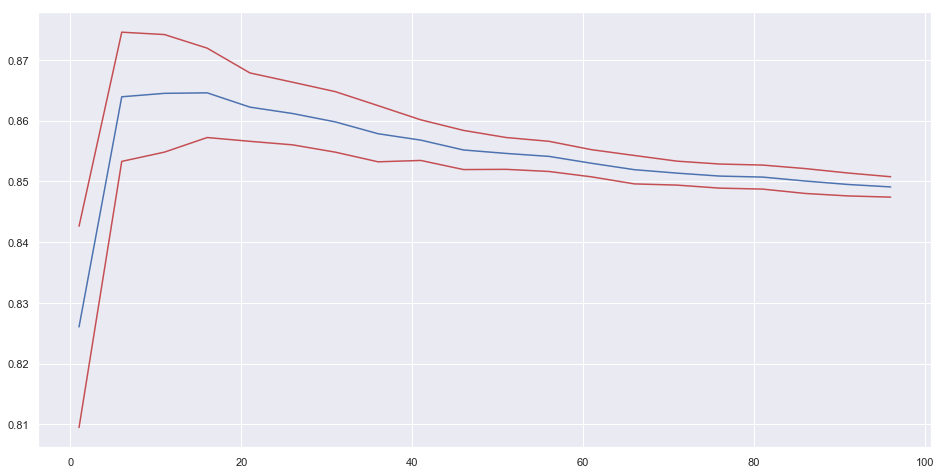

In [0]:
plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r');

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
print("Cantidad de labels '1' antes de SMOTE: {}".format(sum(y_train==1)))
print("Cantidad de labels '0' antes de SMOTE: {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

print("Cantidad de labels '1' después de SMOTE: {}".format(sum(y_train==1)))
print("Cantidad de labels '0' después de SMOTE: {} \n".format(sum(y_train==0)))

print('Shape de X_train después de SMOTE: {}'.format(X_train.shape))
print('Shape de y_train después de SMOTE: {} \n'.format(y_train.shape))


Cantidad de labels '1' antes de SMOTE: 1275
Cantidad de labels '0' antes de SMOTE: 6986 

Cantidad de labels '1' después de SMOTE: 6986
Cantidad de labels '0' después de SMOTE: 6986 

Shape de X_train después de SMOTE: (13972, 17)
Shape de y_train después de SMOTE: (13972,) 



In [0]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
le = preprocessing.LabelEncoder()
y =  le.fit_transform(df['Revenue'])

C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=16)
# Lo ajustamos sobre datos de entrenamiento
result = model.fit(X_train,y_train)

In [0]:
# Lo utilizamos para predecir en test
y_pred = model.predict(X_test)

0.8257557139346277


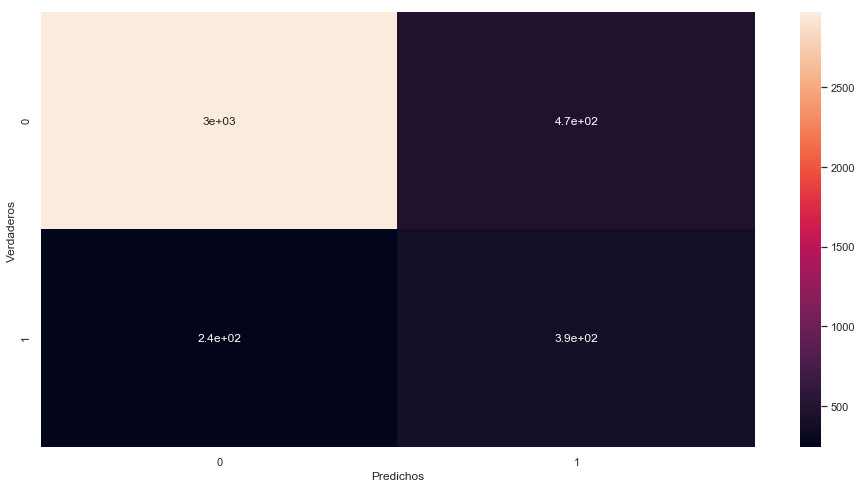

In [0]:
# Matriz de confusión
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');
print(accuracy_score(y_test, y_pred))

In [0]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[2969  467]
 [ 242  391]]


In [0]:
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [0]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))

0.8257557139346277
0.8257557139346277


In [0]:
class_error = (FP + FN) / float(TP + TN + FP + FN)

print(class_error)
print(1 - accuracy_score(y_test, y_pred))

0.17424428606537232
0.17424428606537234


In [0]:
from sklearn.metrics import recall_score
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(recall_score(y_test, y_pred))

0.617693522906793
0.617693522906793


In [0]:
specificity = TN / (TN + FP)

print(specificity)

0.8640861466821886


In [0]:
from sklearn.metrics import precision_score

precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_pred))

0.4557109557109557
0.4557109557109557


In [0]:
from sklearn.metrics import f1_score

f1 = 2*((precision*sensitivity)/(precision+sensitivity))

print(f1)
print(f1_score(y_test,y_pred))

0.5244802146210596
0.5244802146210596


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      3436
           1       0.46      0.62      0.52       633

   micro avg       0.83      0.83      0.83      4069
   macro avg       0.69      0.74      0.71      4069
weighted avg       0.85      0.83      0.84      4069



KNN (área = 0.74)


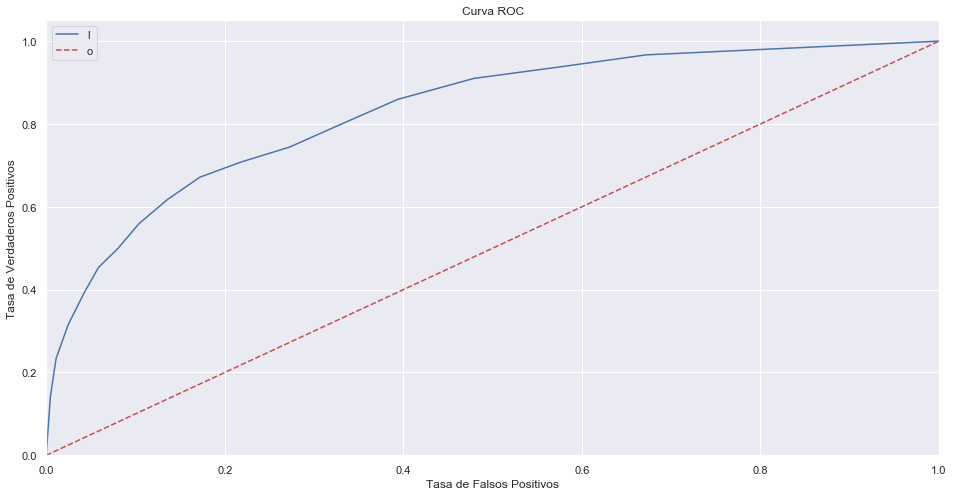

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


print('KNN (área = %0.2f)' % logit_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='KNN (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend("lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
# Aplicamos GridSearch
from sklearn.model_selection import GridSearchCV

# Definimos el modelo y sus parámetros
parameters = {'n_neighbors':[4,5,6,7],
              'leaf_size':[1,3,5],
              'algorithm':['auto', 'kd_tree'],
              'n_jobs':[-1]}

#Fiteamos el modelo
model = GridSearchCV(KNeighborsClassifier(), param_grid=parameters)
result = model.fit(X_train,y_train)

print(result.best_score_)
print(result.best_estimator_)
print(result.best_params_)

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.8723160606928142
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='uniform')
{'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 4}


0.8318997296633079


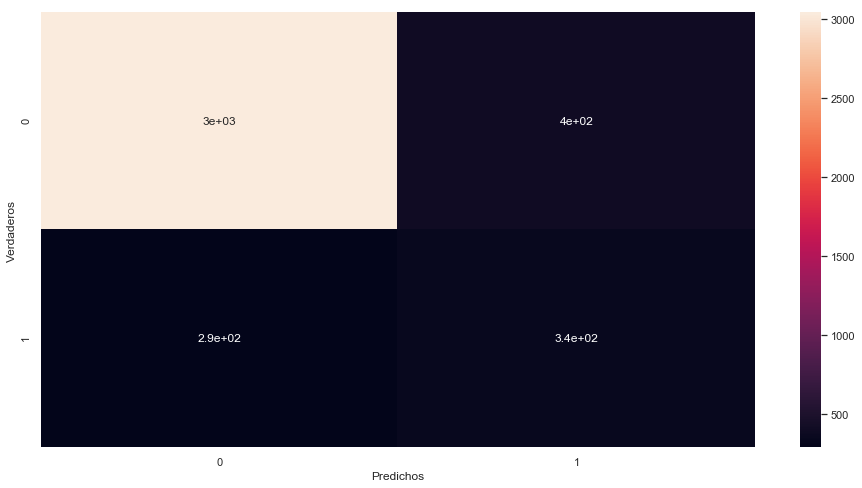

In [0]:
# Predecimos 
y_pred_gs=model.predict(X_test)

# Matriz de confusión con el nuevo y_pred
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred_gs), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');
print(accuracy_score(y_test, y_pred_gs))

In [0]:
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      3436
           1       0.47      0.55      0.50       633

   micro avg       0.83      0.83      0.83      4069
   macro avg       0.69      0.71      0.70      4069
weighted avg       0.84      0.83      0.84      4069



KNN (área = 0.71)


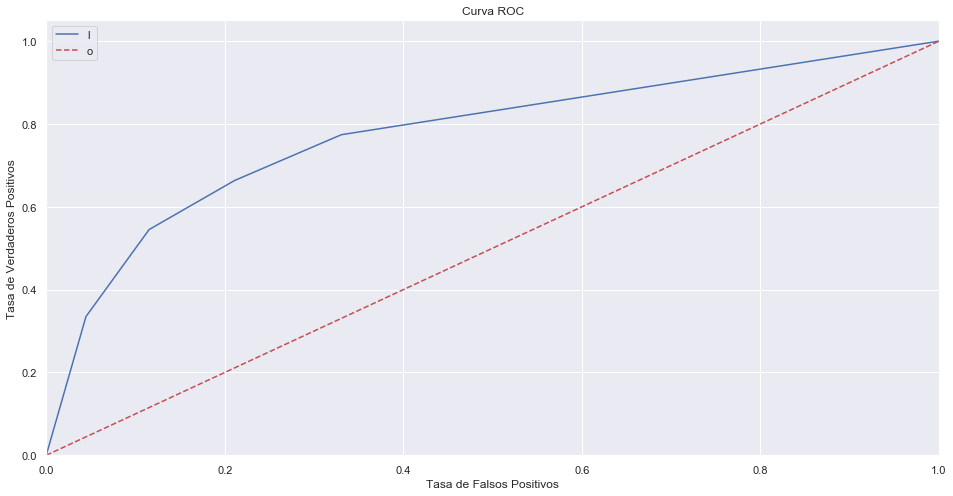

In [0]:
logit_roc_auc = roc_auc_score(y_test, y_pred_gs)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
print('KNN (área = %0.2f)' % logit_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='KNN (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend("lower right")
plt.savefig('Log_ROC')
plt.show()

# Regresión Logística

In [0]:
# Probamos con Regresión Logística
from sklearn import linear_model

In [0]:
# Armamos el X y el Y
X.shape
le = preprocessing.LabelEncoder()
y =  le.fit_transform(df['Revenue'])
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
print("Cantidad de labels '1' antes de SMOTE: {}".format(sum(y_train==1)))
print("Cantidad de labels '0' antes de SMOTE: {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

print("Cantidad de labels '1' después de SMOTE: {}".format(sum(y_train==1)))
print("Cantidad de labels '0' después de SMOTE: {} \n".format(sum(y_train==0)))

print('Shape de X_train después de SMOTE: {}'.format(X_train.shape))
print('Shape de y_train después de SMOTE: {} \n'.format(y_train.shape))

print((X_test.shape))

Cantidad de labels '1' antes de SMOTE: 1275
Cantidad de labels '0' antes de SMOTE: 6986 

Cantidad de labels '1' después de SMOTE: 6986
Cantidad de labels '0' después de SMOTE: 6986 

Shape de X_train después de SMOTE: (13972, 17)
Shape de y_train después de SMOTE: (13972,) 

(4069, 17)


In [0]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

le = preprocessing.LabelEncoder()
y =  le.fit_transform(df['Revenue'])

C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# Aplicamos el modelo
model = linear_model.LogisticRegression()
# Lo aplicamos sobre el entrenamiento
result = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8783484885721308


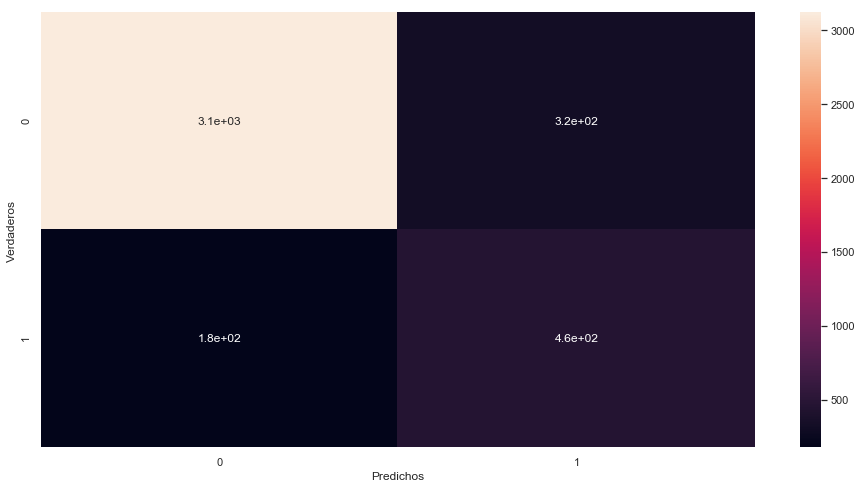

In [0]:
# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');
print(accuracy_score(y_test, y_pred))

In [0]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[3118  318]
 [ 177  456]]


In [0]:
precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, y_pred))

0.4557109557109557
0.5891472868217055


In [0]:
f1 = 2*((precision*sensitivity)/(precision+sensitivity))

print(f1)
print(f1_score(y_test,y_pred))

0.5244802146210596
0.6481876332622601


KNN (área = 0.73)


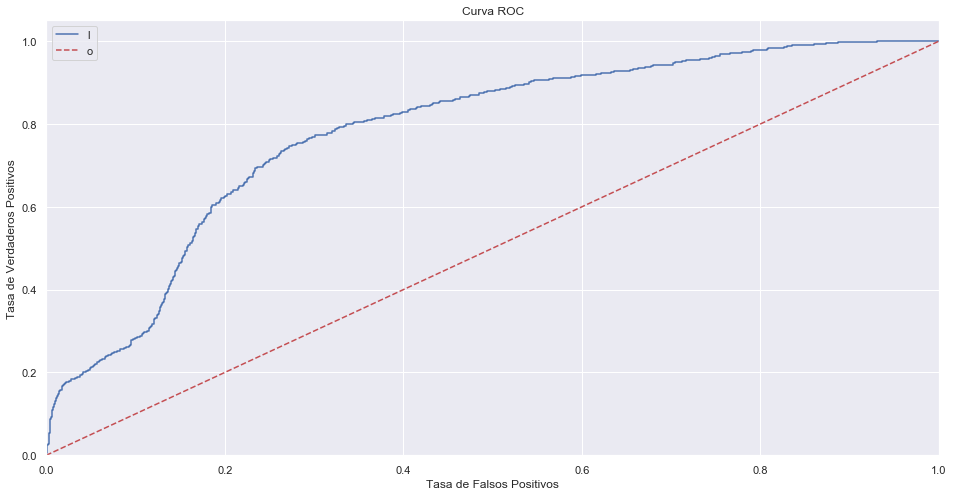

In [0]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


print('KNN (área = %0.2f)' % logit_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='KNN (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend("lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
# Aplicamos GridSearch
from sklearn.linear_model  import LogisticRegression

# Definimos el modelo y sus parámetros
parameters = {'C': np.logspace(0, 4, 100), 
                   'penalty': ['l1', 'l2']}
#Fiteamos el modelo
model = GridSearchCV(LogisticRegression(), param_grid=parameters)
result = model.fit(X_train,y_train)

print(result.best_score_)
print(result.best_estimator_)
print(result.best_params_)

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Gaby\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

0.8369596335528199
LogisticRegression(C=4.862601580065355, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
{'C': 4.862601580065355, 'penalty': 'l1'}


Mejor Penalización: l1
Mejor C: 4.862601580065355
0.8785942492012779


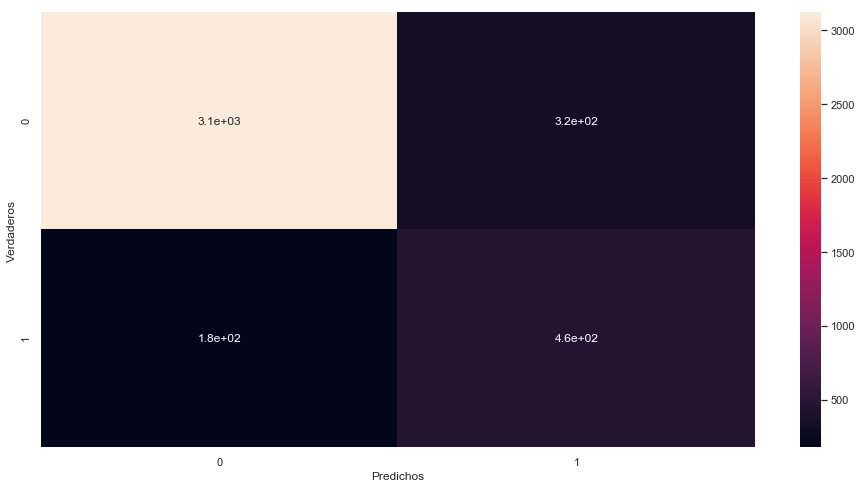

In [0]:
# Predecimos 
y_pred_gs=model.predict(X_test)
print('Mejor Penalización:', result.best_estimator_.get_params()['penalty'])
print('Mejor C:', result.best_estimator_.get_params()['C'])

# Matriz de confusión con el nuevo y_pred
import seaborn as sns

sns.heatmap(confusion_matrix(y_test, y_pred_gs), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');
print(accuracy_score(y_test, y_pred_gs))

In [0]:
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3436
           1       0.59      0.72      0.65       633

   micro avg       0.88      0.88      0.88      4069
   macro avg       0.77      0.81      0.79      4069
weighted avg       0.89      0.88      0.88      4069



RL (área = 0.81)


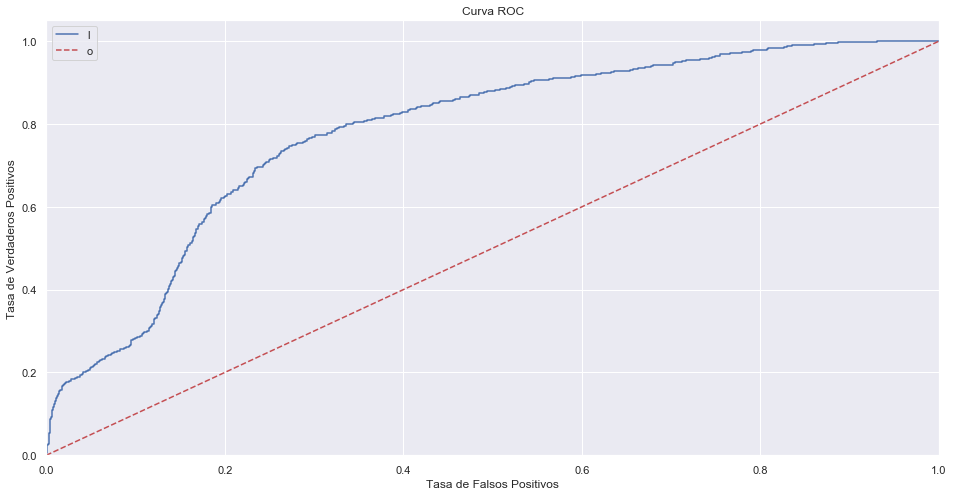

In [0]:
logit_roc_auc = roc_auc_score(y_test, y_pred_gs)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


print('RL (área = %0.2f)' % logit_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='KNN (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend("lower right")
plt.savefig('Log_ROC')
plt.show()

# Bayes Gaussiano

In [0]:
from sklearn.naive_bayes import GaussianNB

In [0]:
# Armamos el X y el Y
X.shape
le = preprocessing.LabelEncoder()
y =  le.fit_transform(df['Revenue'])
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [0]:
print("Cantidad de labels '1' antes de SMOTE: {}".format(sum(y_train==1)))
print("Cantidad de labels '0' antes de SMOTE: {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

print("Cantidad de labels '1' después de SMOTE: {}".format(sum(y_train==1)))
print("Cantidad de labels '0' después de SMOTE: {} \n".format(sum(y_train==0)))

print('Shape de X_train después de SMOTE: {}'.format(X_train.shape))
print('Shape de y_train después de SMOTE: {} \n'.format(y_train.shape))

print((X_test.shape))

Cantidad de labels '1' antes de SMOTE: 1275
Cantidad de labels '0' antes de SMOTE: 6986 

Cantidad de labels '1' después de SMOTE: 6986
Cantidad de labels '0' después de SMOTE: 6986 

Shape de X_train después de SMOTE: (13972, 17)
Shape de y_train después de SMOTE: (13972,) 

(4069, 17)


In [0]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

le = preprocessing.LabelEncoder()
y =  le.fit_transform(df['Revenue'])

C:\Users\Gaby\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# Aplicamos el modelo
model = GaussianNB()
# Lo aplicamos sobre el entrenamiento
result = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

0.5573851069058737


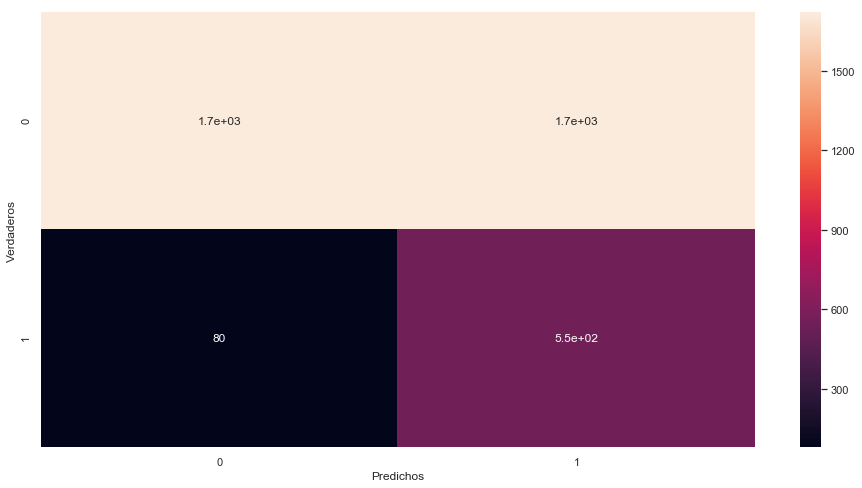

In [0]:
# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True ,fmt='d')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');
print(accuracy_score(y_test, y_pred))

In [0]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[1715 1721]
 [  80  553]]


In [0]:
from sklearn.metrics import f1_score

f1 = 2*((precision*sensitivity)/(precision+sensitivity))

print(f1)
print(f1_score(y_test,y_pred))

0.5244802146210596
0.3804609563123495


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.50      0.66      3436
           1       0.24      0.87      0.38       633

   micro avg       0.56      0.56      0.56      4069
   macro avg       0.60      0.69      0.52      4069
weighted avg       0.84      0.56      0.61      4069



KNN (área = 0.69)


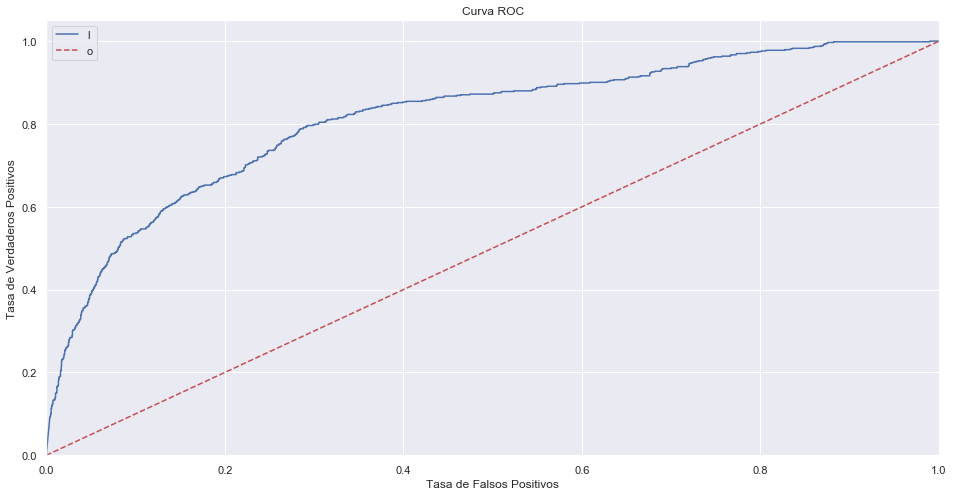

In [0]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


print('Bayes - Gaussian (área = %0.2f)' % logit_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='KNN (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend("lower right")
plt.savefig('Log_ROC')
plt.show()

# Bayes Bernoulli

In [0]:
from sklearn.naive_bayes import BernoulliNB

In [0]:
model = BernoulliNB()
# Lo aplicamos sobre el entrenamiento
result = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

0.7340869992627181


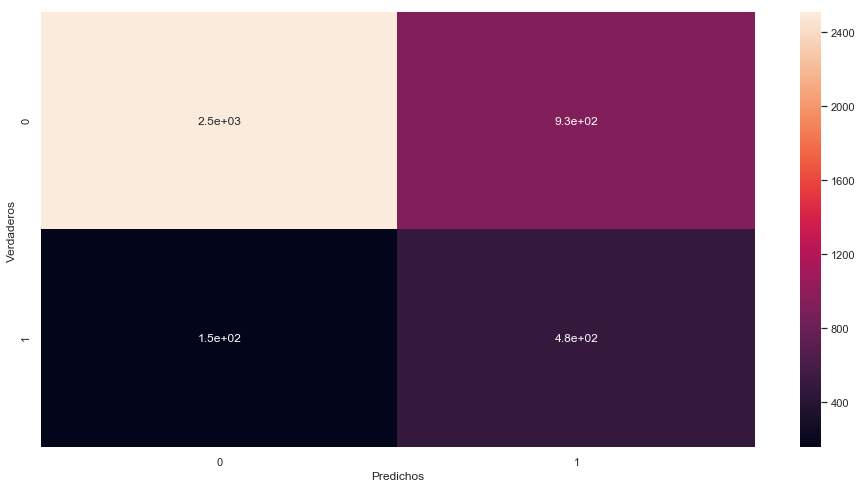

In [0]:
# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');
print(accuracy_score(y_test, y_pred))

In [0]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[2508  928]
 [ 154  479]]


In [0]:
from sklearn.metrics import f1_score

f1 = 2*((precision*sensitivity)/(precision+sensitivity))

print(f1)
print(f1_score(y_test,y_pred))

0.5244802146210596
0.4696078431372549


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.73      0.82      3436
           1       0.34      0.76      0.47       633

   micro avg       0.73      0.73      0.73      4069
   macro avg       0.64      0.74      0.65      4069
weighted avg       0.85      0.73      0.77      4069



Bayes Bernoulli (área = 0.74)


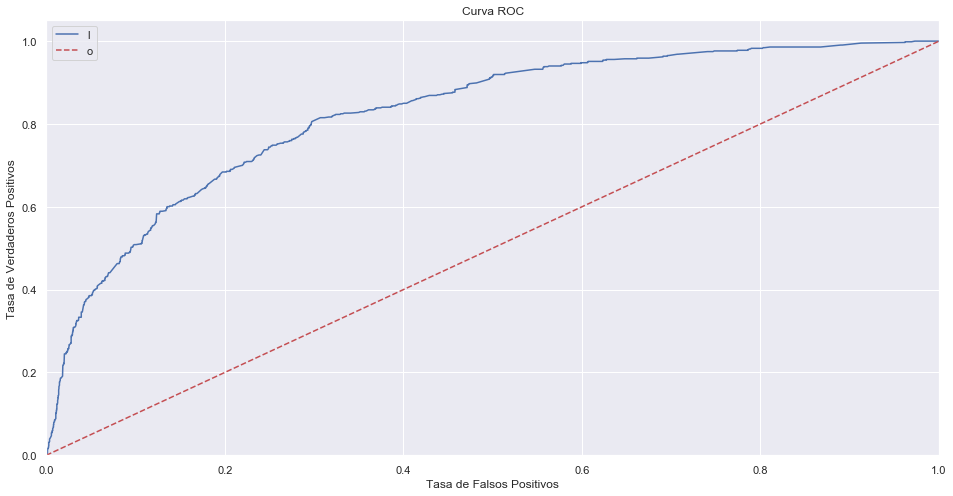

In [0]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


print('Bayes Bernoulli (área = %0.2f)' % logit_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='KNN (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend("lower right")
plt.savefig('Log_ROC')
plt.show()

# Bayes Multinomial

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
model = MultinomialNB()

result = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

0.7097566969771443


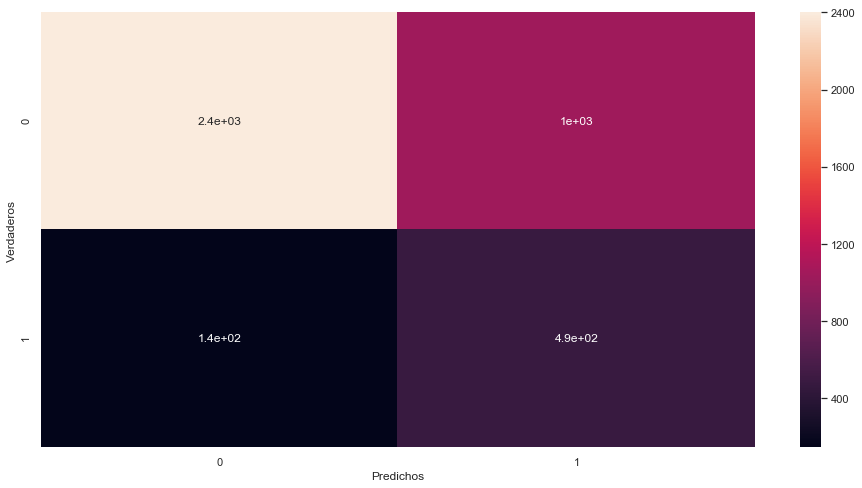

In [0]:
# Matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');
print(accuracy_score(y_test, y_pred))

In [0]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[2400 1036]
 [ 145  488]]


In [0]:
f1 = 2*((precision*sensitivity)/(precision+sensitivity))

print(f1)
print(f1_score(y_test,y_pred))

0.5244802146210596
0.45248029670839135


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80      3436
           1       0.32      0.77      0.45       633

   micro avg       0.71      0.71      0.71      4069
   macro avg       0.63      0.73      0.63      4069
weighted avg       0.85      0.71      0.75      4069



Bayes Bernoulli (área = 0.73)


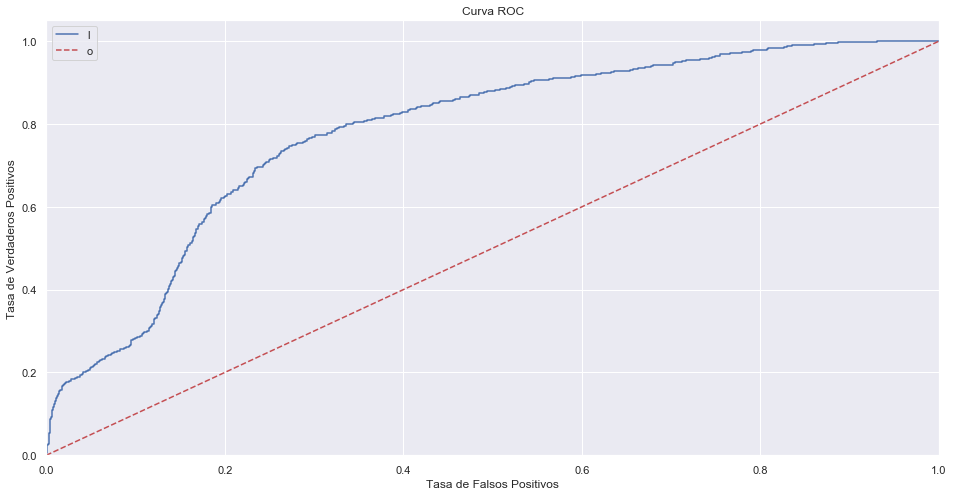

In [0]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


print('Bayes Bernoulli (área = %0.2f)' % logit_roc_auc)

plt.figure()
plt.plot(fpr, tpr, label='KNN (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend("lower right")
plt.savefig('Log_ROC')
plt.show()